In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("/home/root1/ullaas.csv")
df


,hours,scores
0,10,40
1,20,50
2,30,70
3,40,80
4,50,90
5,15,35
6,22,12
7,24,57
8,35,80


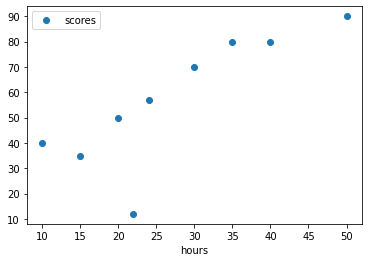

In [24]:
df.plot(x="hours" , y="scores" , style="o")
plt.show()

In [25]:
x_mean = df["hours"].mean()
y_mean = df["scores"].mean()
print(x_mean , y_mean)


27.333333333333332 57.111111111111114


In [26]:
df["x"] = df["hours"] - x_mean
df["y"] = df["scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,hours,scores,x,y,x*y,x^2,y^2
0,10,40,-17.333333,-17.111111,296.592593,300.444444,292.790123
1,20,50,-7.333333,-7.111111,52.148148,53.777778,50.567901
2,30,70,2.666667,12.888889,34.370370,7.111111,166.123457
3,40,80,12.666667,22.888889,289.925926,160.444444,523.901235
4,50,90,22.666667,32.888889,745.481481,513.777778,1081.679012
5,15,35,-12.333333,-22.111111,272.703704,152.111111,488.901235
6,22,12,-5.333333,-45.111111,240.592593,28.444444,2035.012346
7,24,57,-3.333333,-0.111111,0.370370,11.111111,0.012346
8,35,80,7.666667,22.888889,175.481481,58.777778,523.901235


In [27]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

2107.6666666666665 1286.0 5162.888888888889


In [28]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

0.8179656262122157

In [29]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [30]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [32]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

11.953614051360738 23.951081833346365


In [33]:
m = correlation * (std_deviation_y / std_deviation_x)
m

1.6389320891653705

In [34]:
c = df["scores"].mean() - m * df["hours"].mean()
c

12.313634007257654

In [35]:
df["y_prediction"] = m * df["hours"] + c
df

,hours,scores,x,y,x*y,x^2,y^2,y_prediction
0,10,40,-17.333333,-17.111111,296.592593,300.444444,292.790123,28.702955
1,20,50,-7.333333,-7.111111,52.148148,53.777778,50.567901,45.092276
2,30,70,2.666667,12.888889,34.370370,7.111111,166.123457,61.481597
3,40,80,12.666667,22.888889,289.925926,160.444444,523.901235,77.870918
4,50,90,22.666667,32.888889,745.481481,513.777778,1081.679012,94.260238
5,15,35,-12.333333,-22.111111,272.703704,152.111111,488.901235,36.897615
6,22,12,-5.333333,-45.111111,240.592593,28.444444,2035.012346,48.370140
7,24,57,-3.333333,-0.111111,0.370370,11.111111,0.012346,51.648004
8,35,80,7.666667,22.888889,175.481481,58.777778,523.901235,69.676257


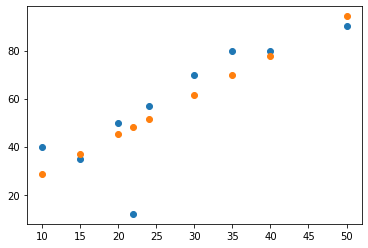

In [36]:
plot1 = plt.scatter(df["hours"], df["scores"])
plot2 = plt.scatter(df["hours"], df["y_prediction"])
plt.show()